### Tune XGBoost Performance With Learning Curves
https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

Generally, a learning curve is a plot that shows time or experience on the x-axis and learning or improvement on the y-axis.
Learning curves are widely used in machine learning for algorithms that learn (optimize their internal parameters) incrementally over time, such as deep learning neural networks.

During the training of a machine learning model, the current state of the model at each step of the training algorithm can be evaluated. It can be evaluated on the training dataset to give an idea of how well the model is “learning.” It can also be evaluated on a hold-out validation dataset that is not part of the training dataset. Evaluation on the validation dataset gives an idea of how well the model is “generalizing.”

It is common to create dual learning curves for a machine learning model during training on both the training and validation datasets.

The shape and dynamics of a learning curve can be used to diagnose the behavior of a machine learning model, and in turn, perhaps suggest the type of configuration changes that may be made to improve learning and/or performance.

There are three common dynamics that you are likely to observe in learning curves; they are:
>Underfit
>Overfit
>Good Fit

[0]	validation_0-logloss:0.59135	validation_1-logloss:0.62291
[1]	validation_0-logloss:0.52201	validation_1-logloss:0.57855
[2]	validation_0-logloss:0.46324	validation_1-logloss:0.53822
[3]	validation_0-logloss:0.41242	validation_1-logloss:0.50522
[4]	validation_0-logloss:0.37203	validation_1-logloss:0.47906
[5]	validation_0-logloss:0.34117	validation_1-logloss:0.45538
[6]	validation_0-logloss:0.31263	validation_1-logloss:0.43821
[7]	validation_0-logloss:0.28817	validation_1-logloss:0.42351
[8]	validation_0-logloss:0.26831	validation_1-logloss:0.40886
[9]	validation_0-logloss:0.25296	validation_1-logloss:0.39517
[10]	validation_0-logloss:0.23563	validation_1-logloss:0.38356
[11]	validation_0-logloss:0.21897	validation_1-logloss:0.37000
[12]	validation_0-logloss:0.20026	validation_1-logloss:0.35480
[13]	validation_0-logloss:0.18666	validation_1-logloss:0.34446
[14]	validation_0-logloss:0.17134	validation_1-logloss:0.33251
[15]	validation_0-logloss:0.16181	validation_1-logloss:0.32547
[1

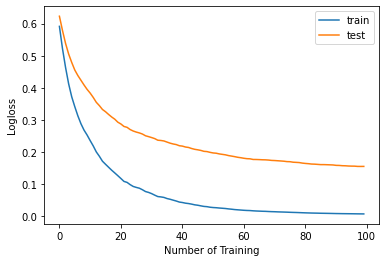

In [2]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.xlabel("Number of Training")
pyplot.ylabel("Logloss")
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.59135	validation_1-logloss:0.62291
[1]	validation_0-logloss:0.52201	validation_1-logloss:0.57855
[2]	validation_0-logloss:0.46324	validation_1-logloss:0.53822
[3]	validation_0-logloss:0.41242	validation_1-logloss:0.50522
[4]	validation_0-logloss:0.37203	validation_1-logloss:0.47906
[5]	validation_0-logloss:0.34117	validation_1-logloss:0.45538
[6]	validation_0-logloss:0.31263	validation_1-logloss:0.43821
[7]	validation_0-logloss:0.28817	validation_1-logloss:0.42351
[8]	validation_0-logloss:0.26831	validation_1-logloss:0.40886
[9]	validation_0-logloss:0.25296	validation_1-logloss:0.39517
[10]	validation_0-logloss:0.23563	validation_1-logloss:0.38356
[11]	validation_0-logloss:0.21897	validation_1-logloss:0.37000
[12]	validation_0-logloss:0.20026	validation_1-logloss:0.35480
[13]	validation_0-logloss:0.18666	validation_1-logloss:0.34446
[14]	validation_0-logloss:0.17134	validation_1-logloss:0.33251
[15]	validation_0-logloss:0.16181	validation_1-logloss:0.32547
[1

[130]	validation_0-logloss:0.00433	validation_1-logloss:0.14518
[131]	validation_0-logloss:0.00427	validation_1-logloss:0.14489
[132]	validation_0-logloss:0.00421	validation_1-logloss:0.14473
[133]	validation_0-logloss:0.00416	validation_1-logloss:0.14458
[134]	validation_0-logloss:0.00411	validation_1-logloss:0.14450
[135]	validation_0-logloss:0.00405	validation_1-logloss:0.14389
[136]	validation_0-logloss:0.00400	validation_1-logloss:0.14337
[137]	validation_0-logloss:0.00395	validation_1-logloss:0.14324
[138]	validation_0-logloss:0.00390	validation_1-logloss:0.14273
[139]	validation_0-logloss:0.00385	validation_1-logloss:0.14226
[140]	validation_0-logloss:0.00380	validation_1-logloss:0.14205
[141]	validation_0-logloss:0.00376	validation_1-logloss:0.14202
[142]	validation_0-logloss:0.00372	validation_1-logloss:0.14208
[143]	validation_0-logloss:0.00367	validation_1-logloss:0.14204
[144]	validation_0-logloss:0.00363	validation_1-logloss:0.14174
[145]	validation_0-logloss:0.00360	valid

[259]	validation_0-logloss:0.00172	validation_1-logloss:0.13147
[260]	validation_0-logloss:0.00172	validation_1-logloss:0.13142
[261]	validation_0-logloss:0.00171	validation_1-logloss:0.13144
[262]	validation_0-logloss:0.00171	validation_1-logloss:0.13142
[263]	validation_0-logloss:0.00170	validation_1-logloss:0.13126
[264]	validation_0-logloss:0.00169	validation_1-logloss:0.13110
[265]	validation_0-logloss:0.00169	validation_1-logloss:0.13116
[266]	validation_0-logloss:0.00168	validation_1-logloss:0.13102
[267]	validation_0-logloss:0.00168	validation_1-logloss:0.13088
[268]	validation_0-logloss:0.00167	validation_1-logloss:0.13069
[269]	validation_0-logloss:0.00167	validation_1-logloss:0.13073
[270]	validation_0-logloss:0.00166	validation_1-logloss:0.13076
[271]	validation_0-logloss:0.00165	validation_1-logloss:0.13076
[272]	validation_0-logloss:0.00165	validation_1-logloss:0.13085
[273]	validation_0-logloss:0.00164	validation_1-logloss:0.13070
[274]	validation_0-logloss:0.00164	valid

[388]	validation_0-logloss:0.00122	validation_1-logloss:0.12729
[389]	validation_0-logloss:0.00122	validation_1-logloss:0.12727
[390]	validation_0-logloss:0.00122	validation_1-logloss:0.12729
[391]	validation_0-logloss:0.00122	validation_1-logloss:0.12730
[392]	validation_0-logloss:0.00122	validation_1-logloss:0.12730
[393]	validation_0-logloss:0.00121	validation_1-logloss:0.12719
[394]	validation_0-logloss:0.00121	validation_1-logloss:0.12726
[395]	validation_0-logloss:0.00121	validation_1-logloss:0.12715
[396]	validation_0-logloss:0.00121	validation_1-logloss:0.12711
[397]	validation_0-logloss:0.00120	validation_1-logloss:0.12707
[398]	validation_0-logloss:0.00120	validation_1-logloss:0.12704
[399]	validation_0-logloss:0.00120	validation_1-logloss:0.12698
[400]	validation_0-logloss:0.00120	validation_1-logloss:0.12699
[401]	validation_0-logloss:0.00120	validation_1-logloss:0.12695
[402]	validation_0-logloss:0.00120	validation_1-logloss:0.12695
[403]	validation_0-logloss:0.00119	valid

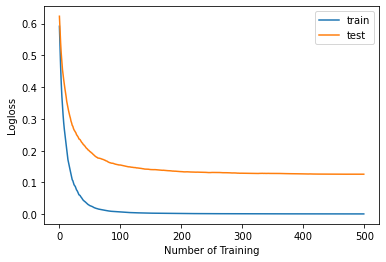

In [3]:
#We can increase the number of iterations of the algorithm via the “n_estimators” hyperparameter that defaults to 100. Let’s increase it to 500.
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.xlabel("Number of Training")
pyplot.ylabel("Logloss")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.67382	validation_1-logloss:0.67914
[1]	validation_0-logloss:0.65609	validation_1-logloss:0.66661
[2]	validation_0-logloss:0.63939	validation_1-logloss:0.65469
[3]	validation_0-logloss:0.62348	validation_1-logloss:0.64301
[4]	validation_0-logloss:0.60882	validation_1-logloss:0.63208
[5]	validation_0-logloss:0.59481	validation_1-logloss:0.62192
[6]	validation_0-logloss:0.58076	validation_1-logloss:0.61150
[7]	validation_0-logloss:0.56782	validation_1-logloss:0.60229
[8]	validation_0-logloss:0.55599	validation_1-logloss:0.59423
[9]	validation_0-logloss:0.54355	validation_1-logloss:0.58544
[10]	validation_0-logloss:0.53150	validation_1-logloss:0.57754
[11]	validation_0-logloss:0.52032	validation_1-logloss:0.56960
[12]	validation_0-logloss:0.50939	validation_1-logloss:0.56244
[13]	validation_0-logloss:0.49923	validation_1-logloss:0.55543
[14]	validation_0-logloss:0.48908	validation_1-logloss:0.54857
[15]	validation_0-logloss:0.47893	validation_1-logloss:0.54088
[1

[130]	validation_0-logloss:0.11865	validation_1-logloss:0.26862
[131]	validation_0-logloss:0.11739	validation_1-logloss:0.26762
[132]	validation_0-logloss:0.11593	validation_1-logloss:0.26619
[133]	validation_0-logloss:0.11492	validation_1-logloss:0.26537
[134]	validation_0-logloss:0.11382	validation_1-logloss:0.26436
[135]	validation_0-logloss:0.11316	validation_1-logloss:0.26376
[136]	validation_0-logloss:0.11264	validation_1-logloss:0.26335
[137]	validation_0-logloss:0.11128	validation_1-logloss:0.26208
[138]	validation_0-logloss:0.11032	validation_1-logloss:0.26126
[139]	validation_0-logloss:0.10962	validation_1-logloss:0.26061
[140]	validation_0-logloss:0.10855	validation_1-logloss:0.25950
[141]	validation_0-logloss:0.10810	validation_1-logloss:0.25903
[142]	validation_0-logloss:0.10679	validation_1-logloss:0.25797
[143]	validation_0-logloss:0.10622	validation_1-logloss:0.25760
[144]	validation_0-logloss:0.10585	validation_1-logloss:0.25731
[145]	validation_0-logloss:0.10538	valid

[259]	validation_0-logloss:0.04187	validation_1-logloss:0.19423
[260]	validation_0-logloss:0.04165	validation_1-logloss:0.19393
[261]	validation_0-logloss:0.04137	validation_1-logloss:0.19359
[262]	validation_0-logloss:0.04097	validation_1-logloss:0.19325
[263]	validation_0-logloss:0.04059	validation_1-logloss:0.19284
[264]	validation_0-logloss:0.04020	validation_1-logloss:0.19231
[265]	validation_0-logloss:0.04001	validation_1-logloss:0.19219
[266]	validation_0-logloss:0.03969	validation_1-logloss:0.19169
[267]	validation_0-logloss:0.03934	validation_1-logloss:0.19121
[268]	validation_0-logloss:0.03925	validation_1-logloss:0.19113
[269]	validation_0-logloss:0.03900	validation_1-logloss:0.19069
[270]	validation_0-logloss:0.03881	validation_1-logloss:0.19045
[271]	validation_0-logloss:0.03854	validation_1-logloss:0.19009
[272]	validation_0-logloss:0.03820	validation_1-logloss:0.18955
[273]	validation_0-logloss:0.03808	validation_1-logloss:0.18948
[274]	validation_0-logloss:0.03788	valid

[388]	validation_0-logloss:0.01836	validation_1-logloss:0.16032
[389]	validation_0-logloss:0.01823	validation_1-logloss:0.16008
[390]	validation_0-logloss:0.01811	validation_1-logloss:0.15981
[391]	validation_0-logloss:0.01798	validation_1-logloss:0.15951
[392]	validation_0-logloss:0.01793	validation_1-logloss:0.15951
[393]	validation_0-logloss:0.01785	validation_1-logloss:0.15947
[394]	validation_0-logloss:0.01771	validation_1-logloss:0.15923
[395]	validation_0-logloss:0.01761	validation_1-logloss:0.15908
[396]	validation_0-logloss:0.01748	validation_1-logloss:0.15886
[397]	validation_0-logloss:0.01741	validation_1-logloss:0.15878
[398]	validation_0-logloss:0.01735	validation_1-logloss:0.15870
[399]	validation_0-logloss:0.01723	validation_1-logloss:0.15857
[400]	validation_0-logloss:0.01713	validation_1-logloss:0.15838
[401]	validation_0-logloss:0.01704	validation_1-logloss:0.15829
[402]	validation_0-logloss:0.01693	validation_1-logloss:0.15810
[403]	validation_0-logloss:0.01686	valid

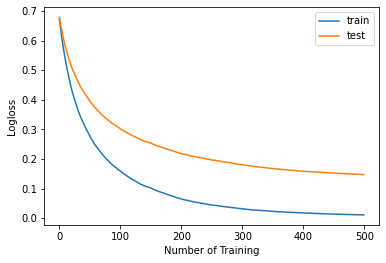

In [4]:
# This can be achieved using the learning rate, which limits the contribution of each tree added to the ensemble. This can be controlled via the “eta” hyperparameter and defaults to the value of 0.3. We can try a smaller value, such as 0.05.
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500, eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.xlabel("Number of Training")
pyplot.ylabel("Logloss")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.67382	validation_1-logloss:0.67914
[1]	validation_0-logloss:0.65609	validation_1-logloss:0.66661
[2]	validation_0-logloss:0.63939	validation_1-logloss:0.65469
[3]	validation_0-logloss:0.62348	validation_1-logloss:0.64301
[4]	validation_0-logloss:0.60882	validation_1-logloss:0.63208
[5]	validation_0-logloss:0.59481	validation_1-logloss:0.62192
[6]	validation_0-logloss:0.58076	validation_1-logloss:0.61150
[7]	validation_0-logloss:0.56782	validation_1-logloss:0.60229
[8]	validation_0-logloss:0.55599	validation_1-logloss:0.59423
[9]	validation_0-logloss:0.54355	validation_1-logloss:0.58544
[10]	validation_0-logloss:0.53150	validation_1-logloss:0.57754
[11]	validation_0-logloss:0.52032	validation_1-logloss:0.56960
[12]	validation_0-logloss:0.50939	validation_1-logloss:0.56244
[13]	validation_0-logloss:0.49923	validation_1-logloss:0.55543
[14]	validation_0-logloss:0.48908	validation_1-logloss:0.54857
[15]	validation_0-logloss:0.47893	validation_1-logloss:0.54088
[1

[130]	validation_0-logloss:0.11865	validation_1-logloss:0.26862
[131]	validation_0-logloss:0.11739	validation_1-logloss:0.26762
[132]	validation_0-logloss:0.11593	validation_1-logloss:0.26619
[133]	validation_0-logloss:0.11492	validation_1-logloss:0.26537
[134]	validation_0-logloss:0.11382	validation_1-logloss:0.26436
[135]	validation_0-logloss:0.11316	validation_1-logloss:0.26376
[136]	validation_0-logloss:0.11264	validation_1-logloss:0.26335
[137]	validation_0-logloss:0.11128	validation_1-logloss:0.26208
[138]	validation_0-logloss:0.11032	validation_1-logloss:0.26126
[139]	validation_0-logloss:0.10962	validation_1-logloss:0.26061
[140]	validation_0-logloss:0.10855	validation_1-logloss:0.25950
[141]	validation_0-logloss:0.10810	validation_1-logloss:0.25903
[142]	validation_0-logloss:0.10679	validation_1-logloss:0.25797
[143]	validation_0-logloss:0.10622	validation_1-logloss:0.25760
[144]	validation_0-logloss:0.10585	validation_1-logloss:0.25731
[145]	validation_0-logloss:0.10538	valid

[259]	validation_0-logloss:0.04187	validation_1-logloss:0.19423
[260]	validation_0-logloss:0.04165	validation_1-logloss:0.19393
[261]	validation_0-logloss:0.04137	validation_1-logloss:0.19359
[262]	validation_0-logloss:0.04097	validation_1-logloss:0.19325
[263]	validation_0-logloss:0.04059	validation_1-logloss:0.19284
[264]	validation_0-logloss:0.04020	validation_1-logloss:0.19231
[265]	validation_0-logloss:0.04001	validation_1-logloss:0.19219
[266]	validation_0-logloss:0.03969	validation_1-logloss:0.19169
[267]	validation_0-logloss:0.03934	validation_1-logloss:0.19121
[268]	validation_0-logloss:0.03925	validation_1-logloss:0.19113
[269]	validation_0-logloss:0.03900	validation_1-logloss:0.19069
[270]	validation_0-logloss:0.03881	validation_1-logloss:0.19045
[271]	validation_0-logloss:0.03854	validation_1-logloss:0.19009
[272]	validation_0-logloss:0.03820	validation_1-logloss:0.18955
[273]	validation_0-logloss:0.03808	validation_1-logloss:0.18948
[274]	validation_0-logloss:0.03788	valid

[388]	validation_0-logloss:0.01836	validation_1-logloss:0.16032
[389]	validation_0-logloss:0.01823	validation_1-logloss:0.16008
[390]	validation_0-logloss:0.01811	validation_1-logloss:0.15981
[391]	validation_0-logloss:0.01798	validation_1-logloss:0.15951
[392]	validation_0-logloss:0.01793	validation_1-logloss:0.15951
[393]	validation_0-logloss:0.01785	validation_1-logloss:0.15947
[394]	validation_0-logloss:0.01771	validation_1-logloss:0.15923
[395]	validation_0-logloss:0.01761	validation_1-logloss:0.15908
[396]	validation_0-logloss:0.01748	validation_1-logloss:0.15886
[397]	validation_0-logloss:0.01741	validation_1-logloss:0.15878
[398]	validation_0-logloss:0.01735	validation_1-logloss:0.15870
[399]	validation_0-logloss:0.01723	validation_1-logloss:0.15857
[400]	validation_0-logloss:0.01713	validation_1-logloss:0.15838
[401]	validation_0-logloss:0.01704	validation_1-logloss:0.15829
[402]	validation_0-logloss:0.01693	validation_1-logloss:0.15810
[403]	validation_0-logloss:0.01686	valid

[517]	validation_0-logloss:0.01003	validation_1-logloss:0.14556
[518]	validation_0-logloss:0.00999	validation_1-logloss:0.14540
[519]	validation_0-logloss:0.00994	validation_1-logloss:0.14523
[520]	validation_0-logloss:0.00990	validation_1-logloss:0.14513
[521]	validation_0-logloss:0.00985	validation_1-logloss:0.14506
[522]	validation_0-logloss:0.00982	validation_1-logloss:0.14506
[523]	validation_0-logloss:0.00977	validation_1-logloss:0.14489
[524]	validation_0-logloss:0.00972	validation_1-logloss:0.14474
[525]	validation_0-logloss:0.00969	validation_1-logloss:0.14468
[526]	validation_0-logloss:0.00965	validation_1-logloss:0.14466
[527]	validation_0-logloss:0.00960	validation_1-logloss:0.14455
[528]	validation_0-logloss:0.00956	validation_1-logloss:0.14436
[529]	validation_0-logloss:0.00953	validation_1-logloss:0.14429
[530]	validation_0-logloss:0.00948	validation_1-logloss:0.14420
[531]	validation_0-logloss:0.00945	validation_1-logloss:0.14404
[532]	validation_0-logloss:0.00941	valid

[646]	validation_0-logloss:0.00638	validation_1-logloss:0.13658
[647]	validation_0-logloss:0.00636	validation_1-logloss:0.13655
[648]	validation_0-logloss:0.00635	validation_1-logloss:0.13648
[649]	validation_0-logloss:0.00634	validation_1-logloss:0.13652
[650]	validation_0-logloss:0.00632	validation_1-logloss:0.13640
[651]	validation_0-logloss:0.00630	validation_1-logloss:0.13638
[652]	validation_0-logloss:0.00629	validation_1-logloss:0.13630
[653]	validation_0-logloss:0.00626	validation_1-logloss:0.13618
[654]	validation_0-logloss:0.00624	validation_1-logloss:0.13615
[655]	validation_0-logloss:0.00623	validation_1-logloss:0.13611
[656]	validation_0-logloss:0.00621	validation_1-logloss:0.13601
[657]	validation_0-logloss:0.00619	validation_1-logloss:0.13601
[658]	validation_0-logloss:0.00617	validation_1-logloss:0.13595
[659]	validation_0-logloss:0.00615	validation_1-logloss:0.13591
[660]	validation_0-logloss:0.00613	validation_1-logloss:0.13589
[661]	validation_0-logloss:0.00611	valid

[775]	validation_0-logloss:0.00462	validation_1-logloss:0.13165
[776]	validation_0-logloss:0.00460	validation_1-logloss:0.13163
[777]	validation_0-logloss:0.00460	validation_1-logloss:0.13162
[778]	validation_0-logloss:0.00459	validation_1-logloss:0.13161
[779]	validation_0-logloss:0.00458	validation_1-logloss:0.13153
[780]	validation_0-logloss:0.00456	validation_1-logloss:0.13149
[781]	validation_0-logloss:0.00455	validation_1-logloss:0.13139
[782]	validation_0-logloss:0.00454	validation_1-logloss:0.13136
[783]	validation_0-logloss:0.00453	validation_1-logloss:0.13133
[784]	validation_0-logloss:0.00452	validation_1-logloss:0.13131
[785]	validation_0-logloss:0.00451	validation_1-logloss:0.13131
[786]	validation_0-logloss:0.00451	validation_1-logloss:0.13132
[787]	validation_0-logloss:0.00449	validation_1-logloss:0.13123
[788]	validation_0-logloss:0.00449	validation_1-logloss:0.13132
[789]	validation_0-logloss:0.00448	validation_1-logloss:0.13132
[790]	validation_0-logloss:0.00447	valid

[904]	validation_0-logloss:0.00361	validation_1-logloss:0.12820
[905]	validation_0-logloss:0.00360	validation_1-logloss:0.12815
[906]	validation_0-logloss:0.00359	validation_1-logloss:0.12815
[907]	validation_0-logloss:0.00359	validation_1-logloss:0.12814
[908]	validation_0-logloss:0.00358	validation_1-logloss:0.12816
[909]	validation_0-logloss:0.00358	validation_1-logloss:0.12813
[910]	validation_0-logloss:0.00357	validation_1-logloss:0.12812
[911]	validation_0-logloss:0.00357	validation_1-logloss:0.12805
[912]	validation_0-logloss:0.00356	validation_1-logloss:0.12799
[913]	validation_0-logloss:0.00356	validation_1-logloss:0.12802
[914]	validation_0-logloss:0.00355	validation_1-logloss:0.12801
[915]	validation_0-logloss:0.00354	validation_1-logloss:0.12797
[916]	validation_0-logloss:0.00354	validation_1-logloss:0.12796
[917]	validation_0-logloss:0.00353	validation_1-logloss:0.12795
[918]	validation_0-logloss:0.00352	validation_1-logloss:0.12790
[919]	validation_0-logloss:0.00352	valid

[1032]	validation_0-logloss:0.00297	validation_1-logloss:0.12571
[1033]	validation_0-logloss:0.00297	validation_1-logloss:0.12567
[1034]	validation_0-logloss:0.00296	validation_1-logloss:0.12566
[1035]	validation_0-logloss:0.00296	validation_1-logloss:0.12567
[1036]	validation_0-logloss:0.00295	validation_1-logloss:0.12567
[1037]	validation_0-logloss:0.00295	validation_1-logloss:0.12566
[1038]	validation_0-logloss:0.00295	validation_1-logloss:0.12565
[1039]	validation_0-logloss:0.00294	validation_1-logloss:0.12562
[1040]	validation_0-logloss:0.00294	validation_1-logloss:0.12559
[1041]	validation_0-logloss:0.00294	validation_1-logloss:0.12560
[1042]	validation_0-logloss:0.00293	validation_1-logloss:0.12555
[1043]	validation_0-logloss:0.00293	validation_1-logloss:0.12553
[1044]	validation_0-logloss:0.00292	validation_1-logloss:0.12548
[1045]	validation_0-logloss:0.00292	validation_1-logloss:0.12548
[1046]	validation_0-logloss:0.00291	validation_1-logloss:0.12543
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.00255	validation_1-logloss:0.12465
[1160]	validation_0-logloss:0.00255	validation_1-logloss:0.12470
[1161]	validation_0-logloss:0.00255	validation_1-logloss:0.12469
[1162]	validation_0-logloss:0.00254	validation_1-logloss:0.12467
[1163]	validation_0-logloss:0.00254	validation_1-logloss:0.12466
[1164]	validation_0-logloss:0.00254	validation_1-logloss:0.12462
[1165]	validation_0-logloss:0.00254	validation_1-logloss:0.12463
[1166]	validation_0-logloss:0.00253	validation_1-logloss:0.12462
[1167]	validation_0-logloss:0.00253	validation_1-logloss:0.12463
[1168]	validation_0-logloss:0.00253	validation_1-logloss:0.12462
[1169]	validation_0-logloss:0.00252	validation_1-logloss:0.12464
[1170]	validation_0-logloss:0.00252	validation_1-logloss:0.12463
[1171]	validation_0-logloss:0.00252	validation_1-logloss:0.12461
[1172]	validation_0-logloss:0.00252	validation_1-logloss:0.12462
[1173]	validation_0-logloss:0.00251	validation_1-logloss:0.12457
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.00225	validation_1-logloss:0.12382
[1287]	validation_0-logloss:0.00225	validation_1-logloss:0.12378
[1288]	validation_0-logloss:0.00225	validation_1-logloss:0.12380
[1289]	validation_0-logloss:0.00224	validation_1-logloss:0.12380
[1290]	validation_0-logloss:0.00224	validation_1-logloss:0.12376
[1291]	validation_0-logloss:0.00224	validation_1-logloss:0.12375
[1292]	validation_0-logloss:0.00224	validation_1-logloss:0.12375
[1293]	validation_0-logloss:0.00223	validation_1-logloss:0.12374
[1294]	validation_0-logloss:0.00223	validation_1-logloss:0.12373
[1295]	validation_0-logloss:0.00223	validation_1-logloss:0.12373
[1296]	validation_0-logloss:0.00223	validation_1-logloss:0.12377
[1297]	validation_0-logloss:0.00223	validation_1-logloss:0.12378
[1298]	validation_0-logloss:0.00222	validation_1-logloss:0.12373
[1299]	validation_0-logloss:0.00222	validation_1-logloss:0.12369
[1300]	validation_0-logloss:0.00222	validation_1-logloss:0.12364
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.00202	validation_1-logloss:0.12294
[1414]	validation_0-logloss:0.00202	validation_1-logloss:0.12295
[1415]	validation_0-logloss:0.00202	validation_1-logloss:0.12294
[1416]	validation_0-logloss:0.00201	validation_1-logloss:0.12293
[1417]	validation_0-logloss:0.00201	validation_1-logloss:0.12292
[1418]	validation_0-logloss:0.00201	validation_1-logloss:0.12290
[1419]	validation_0-logloss:0.00201	validation_1-logloss:0.12294
[1420]	validation_0-logloss:0.00201	validation_1-logloss:0.12295
[1421]	validation_0-logloss:0.00201	validation_1-logloss:0.12297
[1422]	validation_0-logloss:0.00200	validation_1-logloss:0.12293
[1423]	validation_0-logloss:0.00200	validation_1-logloss:0.12293
[1424]	validation_0-logloss:0.00200	validation_1-logloss:0.12292
[1425]	validation_0-logloss:0.00200	validation_1-logloss:0.12289
[1426]	validation_0-logloss:0.00200	validation_1-logloss:0.12291
[1427]	validation_0-logloss:0.00200	validation_1-logloss:0.12290
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.00184	validation_1-logloss:0.12256
[1541]	validation_0-logloss:0.00184	validation_1-logloss:0.12256
[1542]	validation_0-logloss:0.00184	validation_1-logloss:0.12257
[1543]	validation_0-logloss:0.00184	validation_1-logloss:0.12257
[1544]	validation_0-logloss:0.00184	validation_1-logloss:0.12255
[1545]	validation_0-logloss:0.00184	validation_1-logloss:0.12254
[1546]	validation_0-logloss:0.00183	validation_1-logloss:0.12251
[1547]	validation_0-logloss:0.00183	validation_1-logloss:0.12252
[1548]	validation_0-logloss:0.00183	validation_1-logloss:0.12250
[1549]	validation_0-logloss:0.00183	validation_1-logloss:0.12249
[1550]	validation_0-logloss:0.00183	validation_1-logloss:0.12248
[1551]	validation_0-logloss:0.00183	validation_1-logloss:0.12248
[1552]	validation_0-logloss:0.00183	validation_1-logloss:0.12247
[1553]	validation_0-logloss:0.00183	validation_1-logloss:0.12245
[1554]	validation_0-logloss:0.00183	validation_1-logloss:0.12247
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.00170	validation_1-logloss:0.12194
[1668]	validation_0-logloss:0.00170	validation_1-logloss:0.12194
[1669]	validation_0-logloss:0.00170	validation_1-logloss:0.12192
[1670]	validation_0-logloss:0.00170	validation_1-logloss:0.12193
[1671]	validation_0-logloss:0.00170	validation_1-logloss:0.12195
[1672]	validation_0-logloss:0.00170	validation_1-logloss:0.12194
[1673]	validation_0-logloss:0.00169	validation_1-logloss:0.12194
[1674]	validation_0-logloss:0.00169	validation_1-logloss:0.12193
[1675]	validation_0-logloss:0.00169	validation_1-logloss:0.12192
[1676]	validation_0-logloss:0.00169	validation_1-logloss:0.12191
[1677]	validation_0-logloss:0.00169	validation_1-logloss:0.12190
[1678]	validation_0-logloss:0.00169	validation_1-logloss:0.12187
[1679]	validation_0-logloss:0.00169	validation_1-logloss:0.12187
[1680]	validation_0-logloss:0.00169	validation_1-logloss:0.12185
[1681]	validation_0-logloss:0.00169	validation_1-logloss:0.12186
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.00159	validation_1-logloss:0.12148
[1795]	validation_0-logloss:0.00159	validation_1-logloss:0.12150
[1796]	validation_0-logloss:0.00159	validation_1-logloss:0.12149
[1797]	validation_0-logloss:0.00159	validation_1-logloss:0.12148
[1798]	validation_0-logloss:0.00158	validation_1-logloss:0.12147
[1799]	validation_0-logloss:0.00158	validation_1-logloss:0.12147
[1800]	validation_0-logloss:0.00158	validation_1-logloss:0.12147
[1801]	validation_0-logloss:0.00158	validation_1-logloss:0.12145
[1802]	validation_0-logloss:0.00158	validation_1-logloss:0.12144
[1803]	validation_0-logloss:0.00158	validation_1-logloss:0.12143
[1804]	validation_0-logloss:0.00158	validation_1-logloss:0.12144
[1805]	validation_0-logloss:0.00158	validation_1-logloss:0.12143
[1806]	validation_0-logloss:0.00158	validation_1-logloss:0.12145
[1807]	validation_0-logloss:0.00158	validation_1-logloss:0.12144
[1808]	validation_0-logloss:0.00158	validation_1-logloss:0.12141
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.00150	validation_1-logloss:0.12078
[1922]	validation_0-logloss:0.00150	validation_1-logloss:0.12076
[1923]	validation_0-logloss:0.00149	validation_1-logloss:0.12074
[1924]	validation_0-logloss:0.00149	validation_1-logloss:0.12075
[1925]	validation_0-logloss:0.00149	validation_1-logloss:0.12077
[1926]	validation_0-logloss:0.00149	validation_1-logloss:0.12074
[1927]	validation_0-logloss:0.00149	validation_1-logloss:0.12072
[1928]	validation_0-logloss:0.00149	validation_1-logloss:0.12073
[1929]	validation_0-logloss:0.00149	validation_1-logloss:0.12073
[1930]	validation_0-logloss:0.00149	validation_1-logloss:0.12075
[1931]	validation_0-logloss:0.00149	validation_1-logloss:0.12075
[1932]	validation_0-logloss:0.00149	validation_1-logloss:0.12072
[1933]	validation_0-logloss:0.00149	validation_1-logloss:0.12072
[1934]	validation_0-logloss:0.00149	validation_1-logloss:0.12074
[1935]	validation_0-logloss:0.00149	validation_1-logloss:0.12072
[1936]	validation_0-loglo

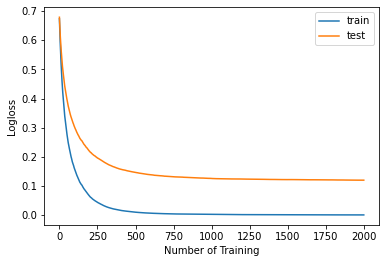

In [5]:
# Let’s try increasing the number of iterations from 500 to 2,000.

# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=2000, eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.xlabel("Number of Training")
pyplot.ylabel("Logloss")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.67804	validation_1-logloss:0.68072
[1]	validation_0-logloss:0.66387	validation_1-logloss:0.66947
[2]	validation_0-logloss:0.65057	validation_1-logloss:0.65971
[3]	validation_0-logloss:0.63794	validation_1-logloss:0.65006
[4]	validation_0-logloss:0.62549	validation_1-logloss:0.64027
[5]	validation_0-logloss:0.61533	validation_1-logloss:0.63284
[6]	validation_0-logloss:0.60495	validation_1-logloss:0.62501
[7]	validation_0-logloss:0.59452	validation_1-logloss:0.61711
[8]	validation_0-logloss:0.58520	validation_1-logloss:0.61024
[9]	validation_0-logloss:0.57456	validation_1-logloss:0.60203
[10]	validation_0-logloss:0.56446	validation_1-logloss:0.59464
[11]	validation_0-logloss:0.55531	validation_1-logloss:0.58810
[12]	validation_0-logloss:0.54605	validation_1-logloss:0.58091
[13]	validation_0-logloss:0.53558	validation_1-logloss:0.57320
[14]	validation_0-logloss:0.52647	validation_1-logloss:0.56656
[15]	validation_0-logloss:0.51753	validation_1-logloss:0.55973
[1

[130]	validation_0-logloss:0.15566	validation_1-logloss:0.27663
[131]	validation_0-logloss:0.15419	validation_1-logloss:0.27552
[132]	validation_0-logloss:0.15289	validation_1-logloss:0.27443
[133]	validation_0-logloss:0.15215	validation_1-logloss:0.27383
[134]	validation_0-logloss:0.15082	validation_1-logloss:0.27296
[135]	validation_0-logloss:0.14935	validation_1-logloss:0.27181
[136]	validation_0-logloss:0.14813	validation_1-logloss:0.27097
[137]	validation_0-logloss:0.14727	validation_1-logloss:0.27009
[138]	validation_0-logloss:0.14633	validation_1-logloss:0.26919
[139]	validation_0-logloss:0.14552	validation_1-logloss:0.26861
[140]	validation_0-logloss:0.14410	validation_1-logloss:0.26720
[141]	validation_0-logloss:0.14302	validation_1-logloss:0.26629
[142]	validation_0-logloss:0.14194	validation_1-logloss:0.26547
[143]	validation_0-logloss:0.14054	validation_1-logloss:0.26451
[144]	validation_0-logloss:0.13976	validation_1-logloss:0.26372
[145]	validation_0-logloss:0.13912	valid

[259]	validation_0-logloss:0.06909	validation_1-logloss:0.19927
[260]	validation_0-logloss:0.06858	validation_1-logloss:0.19859
[261]	validation_0-logloss:0.06827	validation_1-logloss:0.19835
[262]	validation_0-logloss:0.06808	validation_1-logloss:0.19813
[263]	validation_0-logloss:0.06768	validation_1-logloss:0.19768
[264]	validation_0-logloss:0.06727	validation_1-logloss:0.19741
[265]	validation_0-logloss:0.06692	validation_1-logloss:0.19707
[266]	validation_0-logloss:0.06677	validation_1-logloss:0.19694
[267]	validation_0-logloss:0.06621	validation_1-logloss:0.19623
[268]	validation_0-logloss:0.06603	validation_1-logloss:0.19596
[269]	validation_0-logloss:0.06553	validation_1-logloss:0.19538
[270]	validation_0-logloss:0.06521	validation_1-logloss:0.19508
[271]	validation_0-logloss:0.06478	validation_1-logloss:0.19473
[272]	validation_0-logloss:0.06428	validation_1-logloss:0.19414
[273]	validation_0-logloss:0.06381	validation_1-logloss:0.19370
[274]	validation_0-logloss:0.06349	valid

[388]	validation_0-logloss:0.03619	validation_1-logloss:0.16234
[389]	validation_0-logloss:0.03595	validation_1-logloss:0.16186
[390]	validation_0-logloss:0.03580	validation_1-logloss:0.16164
[391]	validation_0-logloss:0.03560	validation_1-logloss:0.16153
[392]	validation_0-logloss:0.03542	validation_1-logloss:0.16153
[393]	validation_0-logloss:0.03528	validation_1-logloss:0.16125
[394]	validation_0-logloss:0.03513	validation_1-logloss:0.16104
[395]	validation_0-logloss:0.03497	validation_1-logloss:0.16090
[396]	validation_0-logloss:0.03480	validation_1-logloss:0.16064
[397]	validation_0-logloss:0.03469	validation_1-logloss:0.16050
[398]	validation_0-logloss:0.03458	validation_1-logloss:0.16033
[399]	validation_0-logloss:0.03438	validation_1-logloss:0.16000
[400]	validation_0-logloss:0.03427	validation_1-logloss:0.15988
[401]	validation_0-logloss:0.03416	validation_1-logloss:0.15962
[402]	validation_0-logloss:0.03400	validation_1-logloss:0.15942
[403]	validation_0-logloss:0.03384	valid

[517]	validation_0-logloss:0.02127	validation_1-logloss:0.14135
[518]	validation_0-logloss:0.02118	validation_1-logloss:0.14119
[519]	validation_0-logloss:0.02111	validation_1-logloss:0.14111
[520]	validation_0-logloss:0.02103	validation_1-logloss:0.14091
[521]	validation_0-logloss:0.02094	validation_1-logloss:0.14070
[522]	validation_0-logloss:0.02084	validation_1-logloss:0.14049
[523]	validation_0-logloss:0.02077	validation_1-logloss:0.14037
[524]	validation_0-logloss:0.02070	validation_1-logloss:0.14029
[525]	validation_0-logloss:0.02067	validation_1-logloss:0.14026
[526]	validation_0-logloss:0.02063	validation_1-logloss:0.14025
[527]	validation_0-logloss:0.02055	validation_1-logloss:0.14016
[528]	validation_0-logloss:0.02051	validation_1-logloss:0.14017
[529]	validation_0-logloss:0.02046	validation_1-logloss:0.14007
[530]	validation_0-logloss:0.02040	validation_1-logloss:0.14000
[531]	validation_0-logloss:0.02034	validation_1-logloss:0.13996
[532]	validation_0-logloss:0.02026	valid

[646]	validation_0-logloss:0.01404	validation_1-logloss:0.12908
[647]	validation_0-logloss:0.01400	validation_1-logloss:0.12904
[648]	validation_0-logloss:0.01395	validation_1-logloss:0.12891
[649]	validation_0-logloss:0.01391	validation_1-logloss:0.12875
[650]	validation_0-logloss:0.01388	validation_1-logloss:0.12875
[651]	validation_0-logloss:0.01384	validation_1-logloss:0.12865
[652]	validation_0-logloss:0.01381	validation_1-logloss:0.12856
[653]	validation_0-logloss:0.01377	validation_1-logloss:0.12844
[654]	validation_0-logloss:0.01373	validation_1-logloss:0.12832
[655]	validation_0-logloss:0.01369	validation_1-logloss:0.12822
[656]	validation_0-logloss:0.01364	validation_1-logloss:0.12813
[657]	validation_0-logloss:0.01361	validation_1-logloss:0.12805
[658]	validation_0-logloss:0.01359	validation_1-logloss:0.12804
[659]	validation_0-logloss:0.01356	validation_1-logloss:0.12802
[660]	validation_0-logloss:0.01352	validation_1-logloss:0.12789
[661]	validation_0-logloss:0.01349	valid

[775]	validation_0-logloss:0.01023	validation_1-logloss:0.12124
[776]	validation_0-logloss:0.01021	validation_1-logloss:0.12116
[777]	validation_0-logloss:0.01019	validation_1-logloss:0.12114
[778]	validation_0-logloss:0.01016	validation_1-logloss:0.12098
[779]	validation_0-logloss:0.01014	validation_1-logloss:0.12084
[780]	validation_0-logloss:0.01011	validation_1-logloss:0.12072
[781]	validation_0-logloss:0.01009	validation_1-logloss:0.12069
[782]	validation_0-logloss:0.01007	validation_1-logloss:0.12068
[783]	validation_0-logloss:0.01005	validation_1-logloss:0.12065
[784]	validation_0-logloss:0.01002	validation_1-logloss:0.12062
[785]	validation_0-logloss:0.01000	validation_1-logloss:0.12061
[786]	validation_0-logloss:0.00997	validation_1-logloss:0.12057
[787]	validation_0-logloss:0.00996	validation_1-logloss:0.12049
[788]	validation_0-logloss:0.00993	validation_1-logloss:0.12046
[789]	validation_0-logloss:0.00991	validation_1-logloss:0.12040
[790]	validation_0-logloss:0.00988	valid

[904]	validation_0-logloss:0.00792	validation_1-logloss:0.11619
[905]	validation_0-logloss:0.00790	validation_1-logloss:0.11607
[906]	validation_0-logloss:0.00788	validation_1-logloss:0.11605
[907]	validation_0-logloss:0.00787	validation_1-logloss:0.11599
[908]	validation_0-logloss:0.00785	validation_1-logloss:0.11594
[909]	validation_0-logloss:0.00784	validation_1-logloss:0.11589
[910]	validation_0-logloss:0.00783	validation_1-logloss:0.11584
[911]	validation_0-logloss:0.00781	validation_1-logloss:0.11590
[912]	validation_0-logloss:0.00780	validation_1-logloss:0.11585
[913]	validation_0-logloss:0.00779	validation_1-logloss:0.11590
[914]	validation_0-logloss:0.00777	validation_1-logloss:0.11590
[915]	validation_0-logloss:0.00777	validation_1-logloss:0.11586
[916]	validation_0-logloss:0.00775	validation_1-logloss:0.11581
[917]	validation_0-logloss:0.00774	validation_1-logloss:0.11574
[918]	validation_0-logloss:0.00772	validation_1-logloss:0.11576
[919]	validation_0-logloss:0.00771	valid

[1032]	validation_0-logloss:0.00647	validation_1-logloss:0.11291
[1033]	validation_0-logloss:0.00646	validation_1-logloss:0.11286
[1034]	validation_0-logloss:0.00645	validation_1-logloss:0.11287
[1035]	validation_0-logloss:0.00644	validation_1-logloss:0.11281
[1036]	validation_0-logloss:0.00643	validation_1-logloss:0.11278
[1037]	validation_0-logloss:0.00642	validation_1-logloss:0.11276
[1038]	validation_0-logloss:0.00641	validation_1-logloss:0.11269
[1039]	validation_0-logloss:0.00640	validation_1-logloss:0.11267
[1040]	validation_0-logloss:0.00639	validation_1-logloss:0.11268
[1041]	validation_0-logloss:0.00638	validation_1-logloss:0.11266
[1042]	validation_0-logloss:0.00638	validation_1-logloss:0.11264
[1043]	validation_0-logloss:0.00637	validation_1-logloss:0.11255
[1044]	validation_0-logloss:0.00636	validation_1-logloss:0.11251
[1045]	validation_0-logloss:0.00635	validation_1-logloss:0.11250
[1046]	validation_0-logloss:0.00634	validation_1-logloss:0.11250
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.00551	validation_1-logloss:0.11005
[1160]	validation_0-logloss:0.00551	validation_1-logloss:0.11009
[1161]	validation_0-logloss:0.00550	validation_1-logloss:0.11009
[1162]	validation_0-logloss:0.00550	validation_1-logloss:0.11004
[1163]	validation_0-logloss:0.00549	validation_1-logloss:0.11002
[1164]	validation_0-logloss:0.00548	validation_1-logloss:0.11005
[1165]	validation_0-logloss:0.00548	validation_1-logloss:0.11007
[1166]	validation_0-logloss:0.00547	validation_1-logloss:0.11004
[1167]	validation_0-logloss:0.00547	validation_1-logloss:0.11006
[1168]	validation_0-logloss:0.00546	validation_1-logloss:0.11002
[1169]	validation_0-logloss:0.00546	validation_1-logloss:0.11000
[1170]	validation_0-logloss:0.00545	validation_1-logloss:0.10997
[1171]	validation_0-logloss:0.00544	validation_1-logloss:0.10991
[1172]	validation_0-logloss:0.00543	validation_1-logloss:0.10986
[1173]	validation_0-logloss:0.00543	validation_1-logloss:0.10984
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.00482	validation_1-logloss:0.10841
[1287]	validation_0-logloss:0.00482	validation_1-logloss:0.10844
[1288]	validation_0-logloss:0.00481	validation_1-logloss:0.10844
[1289]	validation_0-logloss:0.00481	validation_1-logloss:0.10840
[1290]	validation_0-logloss:0.00480	validation_1-logloss:0.10842
[1291]	validation_0-logloss:0.00480	validation_1-logloss:0.10844
[1292]	validation_0-logloss:0.00479	validation_1-logloss:0.10842
[1293]	validation_0-logloss:0.00479	validation_1-logloss:0.10846
[1294]	validation_0-logloss:0.00478	validation_1-logloss:0.10843
[1295]	validation_0-logloss:0.00478	validation_1-logloss:0.10844
[1296]	validation_0-logloss:0.00477	validation_1-logloss:0.10844
[1297]	validation_0-logloss:0.00477	validation_1-logloss:0.10847
[1298]	validation_0-logloss:0.00477	validation_1-logloss:0.10848
[1299]	validation_0-logloss:0.00476	validation_1-logloss:0.10845
[1300]	validation_0-logloss:0.00476	validation_1-logloss:0.10847
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.00430	validation_1-logloss:0.10703
[1414]	validation_0-logloss:0.00429	validation_1-logloss:0.10700
[1415]	validation_0-logloss:0.00429	validation_1-logloss:0.10695
[1416]	validation_0-logloss:0.00429	validation_1-logloss:0.10692
[1417]	validation_0-logloss:0.00428	validation_1-logloss:0.10697
[1418]	validation_0-logloss:0.00428	validation_1-logloss:0.10702
[1419]	validation_0-logloss:0.00428	validation_1-logloss:0.10702
[1420]	validation_0-logloss:0.00427	validation_1-logloss:0.10700
[1421]	validation_0-logloss:0.00427	validation_1-logloss:0.10700
[1422]	validation_0-logloss:0.00427	validation_1-logloss:0.10704
[1423]	validation_0-logloss:0.00426	validation_1-logloss:0.10704
[1424]	validation_0-logloss:0.00426	validation_1-logloss:0.10703
[1425]	validation_0-logloss:0.00426	validation_1-logloss:0.10698
[1426]	validation_0-logloss:0.00426	validation_1-logloss:0.10698
[1427]	validation_0-logloss:0.00425	validation_1-logloss:0.10696
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.00390	validation_1-logloss:0.10596
[1541]	validation_0-logloss:0.00390	validation_1-logloss:0.10598
[1542]	validation_0-logloss:0.00389	validation_1-logloss:0.10593
[1543]	validation_0-logloss:0.00389	validation_1-logloss:0.10590
[1544]	validation_0-logloss:0.00388	validation_1-logloss:0.10591
[1545]	validation_0-logloss:0.00388	validation_1-logloss:0.10592
[1546]	validation_0-logloss:0.00388	validation_1-logloss:0.10594
[1547]	validation_0-logloss:0.00388	validation_1-logloss:0.10594
[1548]	validation_0-logloss:0.00387	validation_1-logloss:0.10593
[1549]	validation_0-logloss:0.00387	validation_1-logloss:0.10594
[1550]	validation_0-logloss:0.00387	validation_1-logloss:0.10594
[1551]	validation_0-logloss:0.00386	validation_1-logloss:0.10591
[1552]	validation_0-logloss:0.00386	validation_1-logloss:0.10585
[1553]	validation_0-logloss:0.00386	validation_1-logloss:0.10585
[1554]	validation_0-logloss:0.00385	validation_1-logloss:0.10585
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.00358	validation_1-logloss:0.10497
[1668]	validation_0-logloss:0.00357	validation_1-logloss:0.10498
[1669]	validation_0-logloss:0.00357	validation_1-logloss:0.10495
[1670]	validation_0-logloss:0.00357	validation_1-logloss:0.10493
[1671]	validation_0-logloss:0.00357	validation_1-logloss:0.10494
[1672]	validation_0-logloss:0.00357	validation_1-logloss:0.10493
[1673]	validation_0-logloss:0.00356	validation_1-logloss:0.10493
[1674]	validation_0-logloss:0.00356	validation_1-logloss:0.10494
[1675]	validation_0-logloss:0.00356	validation_1-logloss:0.10492
[1676]	validation_0-logloss:0.00356	validation_1-logloss:0.10493
[1677]	validation_0-logloss:0.00355	validation_1-logloss:0.10495
[1678]	validation_0-logloss:0.00355	validation_1-logloss:0.10491
[1679]	validation_0-logloss:0.00355	validation_1-logloss:0.10488
[1680]	validation_0-logloss:0.00355	validation_1-logloss:0.10489
[1681]	validation_0-logloss:0.00354	validation_1-logloss:0.10484
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.00332	validation_1-logloss:0.10450
[1795]	validation_0-logloss:0.00332	validation_1-logloss:0.10452
[1796]	validation_0-logloss:0.00332	validation_1-logloss:0.10451
[1797]	validation_0-logloss:0.00331	validation_1-logloss:0.10454
[1798]	validation_0-logloss:0.00331	validation_1-logloss:0.10452
[1799]	validation_0-logloss:0.00331	validation_1-logloss:0.10449
[1800]	validation_0-logloss:0.00331	validation_1-logloss:0.10445
[1801]	validation_0-logloss:0.00331	validation_1-logloss:0.10443
[1802]	validation_0-logloss:0.00331	validation_1-logloss:0.10442
[1803]	validation_0-logloss:0.00330	validation_1-logloss:0.10443
[1804]	validation_0-logloss:0.00330	validation_1-logloss:0.10448
[1805]	validation_0-logloss:0.00330	validation_1-logloss:0.10449
[1806]	validation_0-logloss:0.00330	validation_1-logloss:0.10450
[1807]	validation_0-logloss:0.00330	validation_1-logloss:0.10449
[1808]	validation_0-logloss:0.00330	validation_1-logloss:0.10448
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.00311	validation_1-logloss:0.10383
[1922]	validation_0-logloss:0.00311	validation_1-logloss:0.10381
[1923]	validation_0-logloss:0.00311	validation_1-logloss:0.10381
[1924]	validation_0-logloss:0.00310	validation_1-logloss:0.10382
[1925]	validation_0-logloss:0.00310	validation_1-logloss:0.10380
[1926]	validation_0-logloss:0.00310	validation_1-logloss:0.10384
[1927]	validation_0-logloss:0.00310	validation_1-logloss:0.10385
[1928]	validation_0-logloss:0.00310	validation_1-logloss:0.10381
[1929]	validation_0-logloss:0.00310	validation_1-logloss:0.10380
[1930]	validation_0-logloss:0.00310	validation_1-logloss:0.10381
[1931]	validation_0-logloss:0.00309	validation_1-logloss:0.10382
[1932]	validation_0-logloss:0.00309	validation_1-logloss:0.10381
[1933]	validation_0-logloss:0.00309	validation_1-logloss:0.10383
[1934]	validation_0-logloss:0.00309	validation_1-logloss:0.10386
[1935]	validation_0-logloss:0.00309	validation_1-logloss:0.10381
[1936]	validation_0-loglo

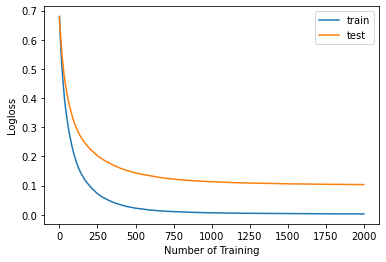

In [6]:
# In this case, we will try halving the number of samples and features respectively via the “subsample” and “colsample_bytree” hyperparameters.

# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.xlabel("Number of Training")
pyplot.ylabel("Logloss")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()